In [44]:
# Standard libraries
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)

# Configuration
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8")

In [46]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\LMS_PROJECT\Linear Regression Project\Dataset\insurance.csv")
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1201,46,male,40.375,2,no,northwest,8733.22925
678,56,male,36.100,3,no,southwest,12363.54700
1332,52,female,44.700,3,no,southwest,11411.68500
579,25,female,23.465,0,no,northeast,3206.49135
643,23,female,34.960,3,no,northwest,4466.62140


# EDA

In [49]:
#Check for null values

In [51]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [55]:
# Check for Outliers

<Axes: >

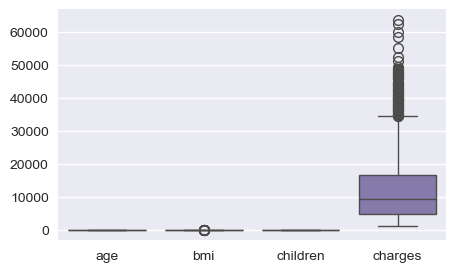

In [57]:
plt.figure(figsize=(5, 3)) 
sns.boxplot(data=df)

## We have to remove outliers from charges variable

In [60]:
for i in df:                  # i = column name
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

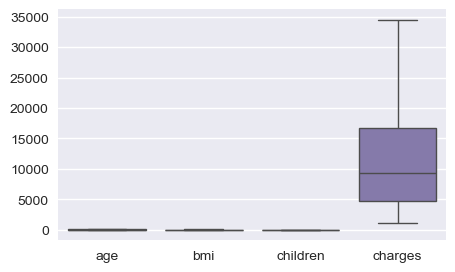

In [62]:
plt.figure(figsize=(5, 3)) 
sns.boxplot(data=df)

### From the boxplot we can see that there is no outliers present in input variables

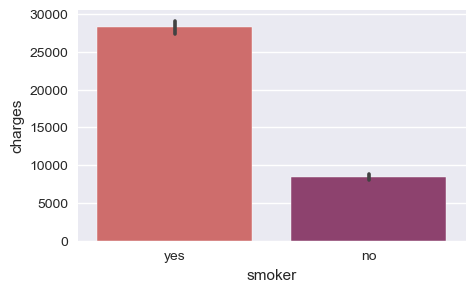

In [65]:
plt.figure(figsize=(5, 3)) 
ax=sns.barplot(x=df.smoker,y=df.charges,palette='flare')

### From the braplot we see that the perseons with smoking habit has higher insurance charges.

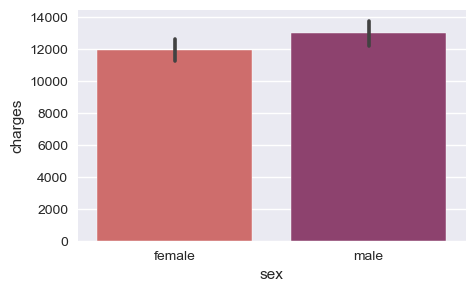

In [68]:
plt.figure(figsize=(5, 3)) 
ax=sns.barplot(x=df.sex,y=df.charges,palette='flare')

# insurance price for male and female is almost same

<Axes: xlabel='region', ylabel='charges'>

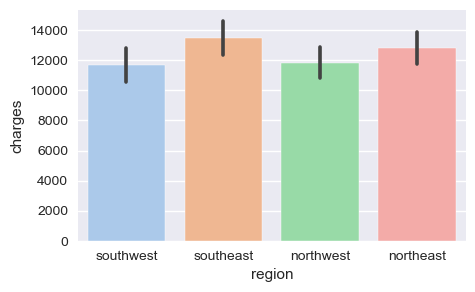

In [71]:
plt.figure(figsize=(5, 3)) 
sns.barplot(x=df.region,y=df.charges,palette='pastel')

### From the barplot we can conclude that insurance charges are slightly higher in South-east and North-east region

# Data Preprocessing

In [391]:
# converting catagorical variable into numeric variable

In [74]:
transformer = ColumnTransformer(transformers=[
    ('tf2',StandardScaler(), ['age','bmi','children']),
    ('tf1', OneHotEncoder(sparse_output=False, drop='first',handle_unknown="ignore"), ['sex', 'smoker', 'region'])
    
], remainder='passthrough')

# Model Building

In [93]:
# Create pipeline with PCA + model
pipeline = Pipeline([
    ('scaler_OHE', transformer),      # Always scale+ohe before PCA!
    ('pca', PCA(n_components=0.95)),   # Keep 95% variance
    ('model', LinearRegression())    # Your model
])

In [78]:
X=df.drop('charges',axis=1)
y=df['charges']
# Split data before any transformation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Fit and evaluate
pipeline.fit(X_train, y_train)
print("Test accuracy:", pipeline.score(X_test, y_test))

Test accuracy: 0.7820045071681241


In [82]:
# Get model and PCA objects from pipeline
model = pipeline.named_steps['model']
pca = pipeline.named_steps['pca']

# Verify dimensions match
print(f"Number of PCA components: {pca.n_components_}")
print(f"Number of coefficients: {len(model.coef_)}")

# Create correct coefficient mapping
coef_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(model.coef_))],  # Use len(model.coef_) instead
    'Coefficient': model.coef_
})

print("Model coefficients per PC:\n", coef_df)

Number of PCA components: 7
Number of coefficients: 7
Model coefficients per PC:
     PC   Coefficient
0  PC1   2946.127875
1  PC2    152.013735
2  PC3    835.721410
3  PC4   3225.116731
4  PC5   -637.656926
5  PC6  -2382.590515
6  PC7  19500.784730


In [95]:
import joblib

# Save the complete pipeline
joblib.dump(pipeline, 'pca_regression_model.pkl')

# Optional: Save with compression (smaller file)
joblib.dump(pipeline, 'pca_regression_model.pkl', compress=9)

['pca_regression_model.pkl']